In [1]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

2025-04-16 22:28:09.927767: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-16 22:28:09.933117: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 22:28:10.006768: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-16 22:28:10.057784: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1744820890.114444    5128 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1744820890.13

In [2]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS=3
EPOCHS = 50

In [3]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle=True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2149 files belonging to 3 classes.


2025-04-16 22:28:14.483521: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [4]:
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [5]:
len(dataset)
    # protibar 32 data nicche so total length hobe 32*68 = total data

68

(32, 256, 256, 3)


2025-04-16 22:28:22.548503: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


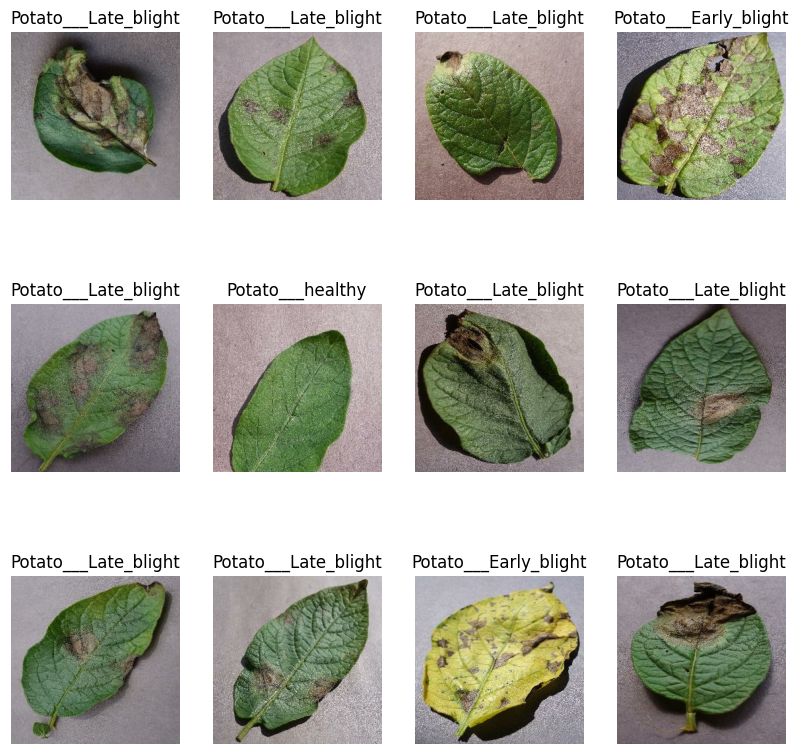

In [6]:

plt.figure(figsize = (10,10))
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)

    for i in range(12):
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[label_batch[i]])
        plt.axis("off")
    
    #print(image_batch[0].shape)
   # print(label_batch.numpy())

In [7]:
# 80% ==> training
# 20% ==> 10% validation, 10% test

In [8]:
train_size = 0.8
len(dataset)*train_size    # 80% of 68*32

54.400000000000006

In [9]:
train_ds = dataset.take(54)
len(train_ds)

# training er jonno 80% data nilam and 68 length theke 54 legth training er jonno 

54

In [10]:
test_ds = dataset.skip(54)
len(test_ds)

#remaining 20% data validation & test 

14

In [11]:
val_size = 0.1    # 10% 
len(dataset)*val_size

6.800000000000001

In [12]:
val_ds = test_ds.take(6)
len(val_ds)

# validation data   6*32= 

6

In [13]:
test_ds = test_ds.skip(6)
len(test_ds)

#test data 8*32

8

In [14]:
# this function take the tensor flow dataset

def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size= 1000):

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    ds_size = len(ds)
    train_size = int(train_split * ds_size)
    val_size = int (val_split * ds_size)
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.take(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)


54

In [17]:
len(val_ds)

6

In [18]:

len(test_ds)

48

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size = tf.data.AUTOTUNE)

# cache read the image from the disk  keep the image in memory 
# shuffle the image
# prefetch if gpu is busy then prefetch will load the next petch from ur disk
#training will fast for that 

In [20]:
import tensorflow as tf
from tensorflow.keras import layers

IMAGE_SIZE = 224  # Adjust as needed

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1.0 / 255)
])


In [21]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2)
])

#augmentation suppose ekta image theke ami arou generate korte pari for test purpose

In [22]:
# data augmentation
# keras 
# tensor flow
# data preprocessing (image)
# image rescaling / resizing

In [23]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

/home/ridwan/.local/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [24]:
model.summary()   # Displays the model architecture, including layer types, output shapes, and the number of parameters.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (32, 224, 224, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (32, 222, 222, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (32, 111, 111, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (32, 109, 109, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (32, 54, 54, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (32, 52, 52, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (32, 26, 26, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (32, 24, 24, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (32, 12, 12, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (32, 10, 10, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (32, 5, 5, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (32, 3, 3, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (32, 1, 1, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (32, 64)               │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (32, 64)               │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 171,459 (669.76 KB)

 Trainable params: 171,459 (669.76 KB)

 Non-trainable params: 0 (0.00 B)

In [25]:
model.compile(  
    optimizer='adam',  # Using the Adam optimizer for efficient training  
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),  # Sparse categorical cross-entropy loss for multi-class classification  
    metrics=['accuracy']  # Tracking accuracy as the evaluation metric  
)  


In [26]:
history = model.fit(  
    train_ds,  # Training dataset  
    epochs= EPOCHS,  # Number of epochs to train the model  
    batch_size=BATCH_SIZE,  # Batch size for training  
    verbose=1,  # Display training progress  
    validation_data=val_ds  # Validation dataset to evaluate performance after each epoch  
)  


Epoch 1/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 25s 442ms/step - accuracy: 0.4442 - loss: 0.9592 - val_accuracy: 0.5365 - val_loss: 0.7770
Epoch 2/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 489ms/step - accuracy: 0.6029 - loss: 0.7595 - val_accuracy: 0.7552 - val_loss: 0.5289
Epoch 3/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 26s 476ms/step - accuracy: 0.7596 - loss: 0.5301 - val_accuracy: 0.8125 - val_loss: 0.3982
Epoch 4/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 37s 688ms/step - accuracy: 0.8410 - loss: 0.4005 - val_accuracy: 0.8958 - val_loss: 0.2712
Epoch 5/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 36s 674ms/step - accuracy: 0.8952 - loss: 0.2819 - val_accuracy: 0.9219 - val_loss: 0.1772
Epoch 6/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 640ms/step - accuracy: 0.9355 - loss: 0.1923 - val_accuracy: 0.9010 - val_loss: 0.2407
Epoch 7/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 34s 639ms/step - accuracy: 0.9202 - loss: 0.2160 - val_accuracy: 0.9271 - val_loss: 0.1902
Epoch 8/50
54/54 ━━━━━━━━━━━━━━━━━━━━ 35s 657ms/step - accuracy: 0.9497 - loss: 0.1254 - val_accu

In [27]:
scores = model.evaluate(test_ds)  # Evaluates the model on the test dataset and returns the loss and accuracy.


48/48 ━━━━━━━━━━━━━━━━━━━━ 6s 110ms/step - accuracy: 0.9995 - loss: 0.0012    


In [28]:
scores


[0.0025130899157375097, 0.9986746311187744]

In [29]:
history.history['accuracy']


[0.47453704476356506,
 0.65625,
 0.7702546119689941,
 0.8420138955116272,
 0.8917824029922485,
 0.9236111044883728,
 0.9380787014961243,
 0.9502314925193787,
 0.9427083134651184,
 0.9646990895271301,
 0.9681712985038757,
 0.9803240895271301,
 0.96875,
 0.9699074029922485,
 0.9629629850387573,
 0.9918981194496155,
 0.9832175970077515,
 0.9953703880310059,
 0.9959490895271301,
 0.9728009104728699,
 0.9936342835426331,
 0.9982638955116272,
 0.9907407164573669,
 0.9629629850387573,
 0.9861111044883728,
 0.9988425970077515,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [30]:
history

In [31]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 54}

In [32]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

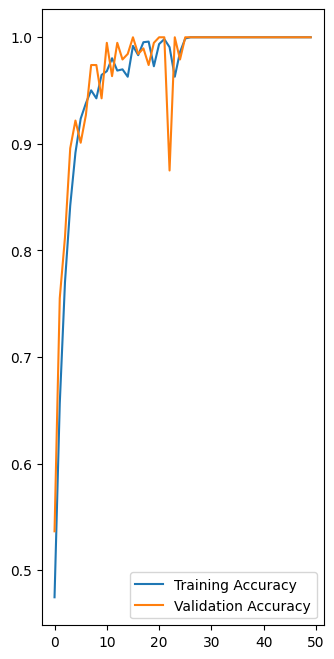

In [33]:
# ধরুন history.history তে 'accuracy' এবং 'val_accuracy' প্রতিটি epoch এর জন্য আছে
# history অবজেক্ট থেকে প্রশিক্ষণ accuracy এর মান গুলি বের করা হচ্ছে
acc = history.history['accuracy']

# history অবজেক্ট থেকে validation accuracy এর মান গুলি বের করা হচ্ছে
val_acc = history.history['val_accuracy']

# epoch সংখ্যা বের করা হচ্ছে (ধরা হচ্ছে 'accuracy' এবং 'val_accuracy' এর দৈর্ঘ্য সমান)
EPOCHS = len(acc)

# গ্রাফ প্লট করার জন্য একটি নতুন ফিগার তৈরি করা হচ্ছে, আকার ৮x৮ ইঞ্চি
plt.figure(figsize=(8,8))

# ১ রো এবং ২ কলামের মধ্যে একটি subplot তৈরি করা হচ্ছে এবং প্রথম subplot নির্বাচন করা হচ্ছে
plt.subplot(1, 2, 1)

# epoch অনুযায়ী প্রশিক্ষণ accuracy প্লট করা হচ্ছে, 'acc' অ্যারে y-মান হিসেবে এবং 'range(EPOCHS)' x-মান হিসেবে ব্যবহার করা হচ্ছে
plt.plot(range(EPOCHS), acc, label='Training Accuracy')

# epoch অনুযায়ী validation accuracy প্লট করা হচ্ছে, 'val_acc' অ্যারে y-মান হিসেবে এবং 'range(EPOCHS)' x-মান হিসেবে ব্যবহার করা হচ্ছে
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')

# প্লটের জন্য একটি legend যোগ করা হচ্ছে, যাতে লাইনগুলির লেবেল থাকে, এবং এটি নিচের ডানদিকে অবস্থান করবে
plt.legend(loc='lower right')


In [37]:
import numpy as np
np.argmax([9.9995482e-01,4.5221495e-05,2.4557109e-13])

np.int64(0)

First image to prediction
Actual label:  Potato___Early_blight
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 191ms/step
predicted class:  Potato___Early_blight


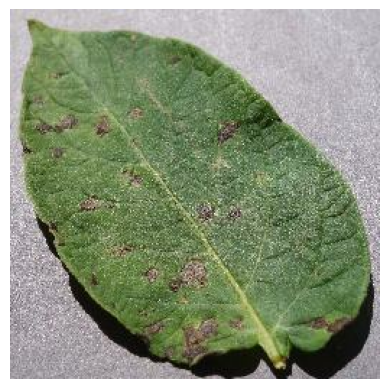

2025-04-17 13:48:09.325033: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [38]:
# টেস্ট ডেটাসেট থেকে এক ব্যাচের মধ্যে লুপ করবো
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    
    # ব্যাচ থেকে প্রথম ইমেজটি নিন এবং সেটিকে NumPy অ্যারে তে রূপান্তর করুন, যা uint8 টাইপ হবে (দেখানোর জন্য)
    first_image = images_batch[0].numpy().astype('uint8')
    
    # ব্যাচ থেকে প্রথম লেবেলটি নিন, যা ক্লাস ইনডেক্সের সাথে সম্পর্কিত
    first_label = labels_batch[0].numpy()
    
    # একটি বার্তা প্রিন্ট করা হচ্ছে যাতে জানানো হয় যে আমরা ইমেজটি দেখাতে যাচ্ছি
    print("First image to prediction")
    
    # Matplotlib এর imshow ফাংশন ব্যবহার করে প্রথম ইমেজটি প্রদর্শন করা হচ্ছে
    plt.imshow(first_image)
    print("Actual label: ",class_names[first_label])
    
    # প্রথম লেবেলটি প্রিন্ট করা হচ্ছে, 'class_names' অ্যারে থেকে ইনডেক্স ব্যবহার করে
    batch_prediction = model.predict(images_batch)
    print("predicted class: ",class_names[np.argmax(batch_prediction[0])])
    
    # ঐচ্ছিক: ইমেজ ডিসপ্লের জন্য অক্ষরগুলি (axes) লুকানো হচ্ছে যাতে ক্লিনার ভিউ হয়
    plt.axis('off')  
    
    # ইমেজটি প্রদর্শন করা হচ্ছে
    plt.show()


In [39]:
# this function is for interface

def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


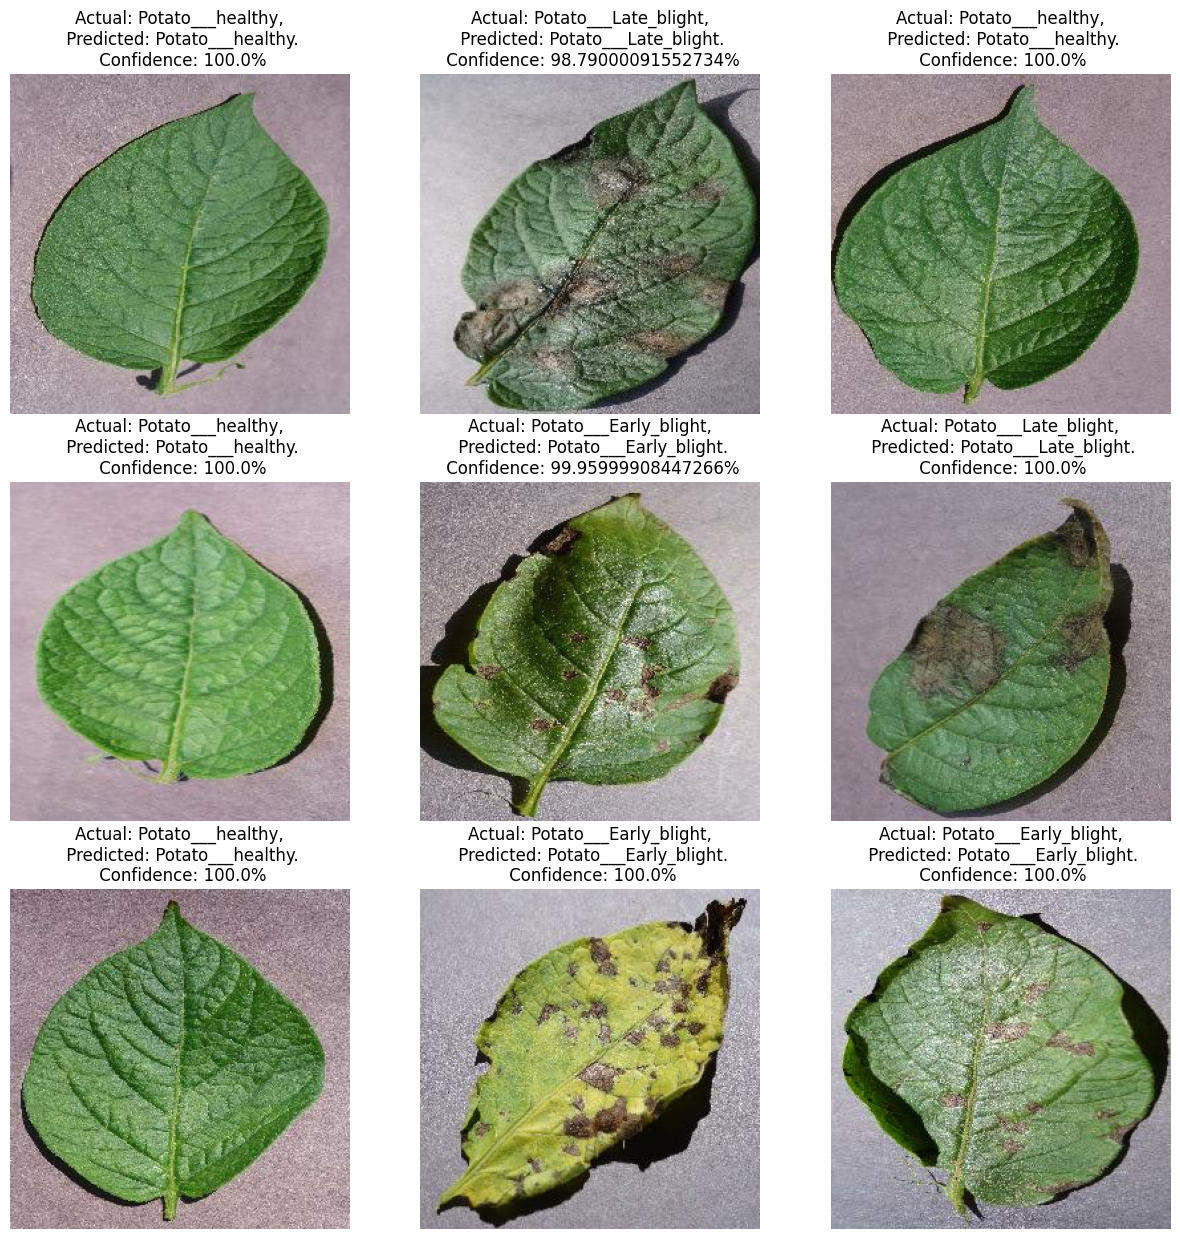

In [40]:
# run this interface on few elements

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [41]:
import os

# Ensure the directory exists
os.makedirs("../models", exist_ok=True)

# Determine the next model version
model_version = max([int(i.split(".")[0]) for i in os.listdir("../models") if i.isdigit()] + [0]) + 1

# Save the model with the correct extension
model.save(f"../models/{model_version}.keras")


In [42]:
model.save(f"../models/{model_version}.h5")
